In [7]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from skimage.filters import gaussian

In [2]:
movie = tifffile.imread('data/registered_full_movie.tif')
movie.shape

(2000, 60, 80)

**Exercise** Create mean projection

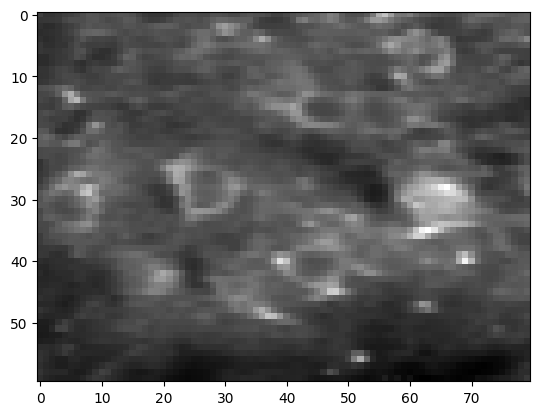

In [4]:
proj = np.mean(movie, axis=0)
plt.imshow(proj, cmap='gray')

**Exercise** Create max projection

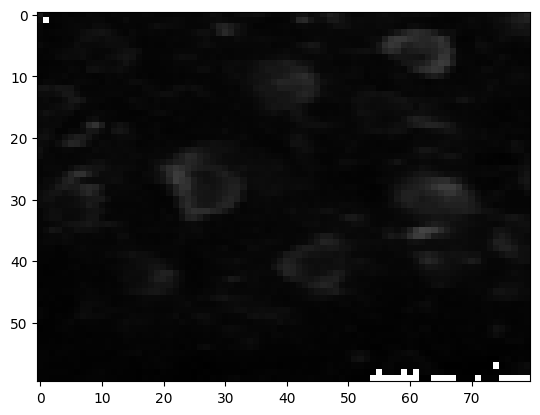

In [5]:
proj = np.max(movie, axis=0)
plt.imshow(proj, cmap='gray')

**Exercise** Create standard deviation projection

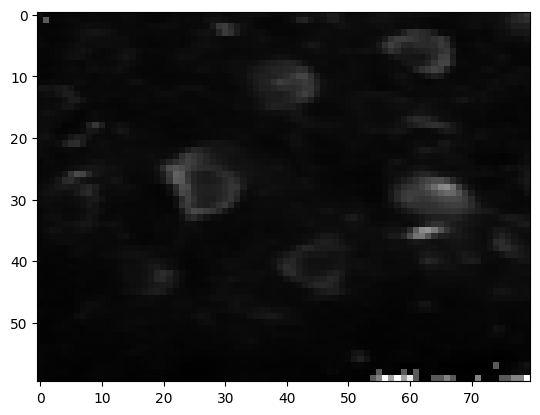

In [6]:
proj = np.std(movie, axis=0)
plt.imshow(proj, cmap='gray')

Gaussian filtering reduces high-frequency noise and enhances the appearance of cell-bodies

**Exercise** Apply gaussian filtering to mean projection image with sigma=1

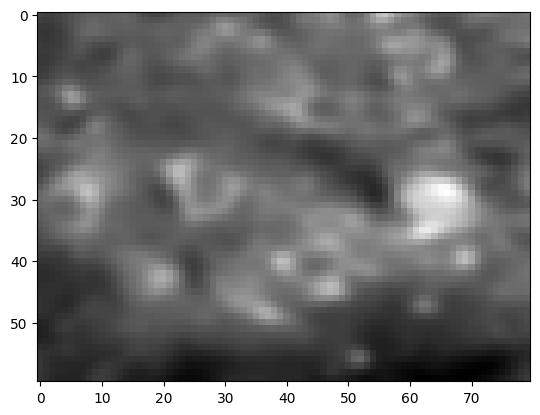

In [8]:
proj = np.mean(movie, axis=0)
proj_smooth = gaussian(proj, sigma=1)
plt.imshow(proj_smooth, cmap='gray')

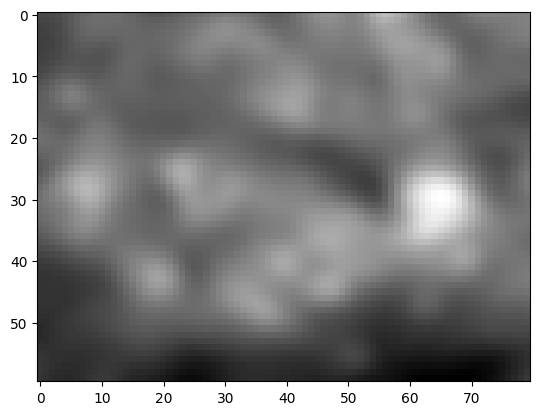

In [11]:
proj = np.mean(movie, axis=0)
proj_smooth = gaussian(proj, sigma=2)
plt.imshow(proj_smooth, cmap='gray')

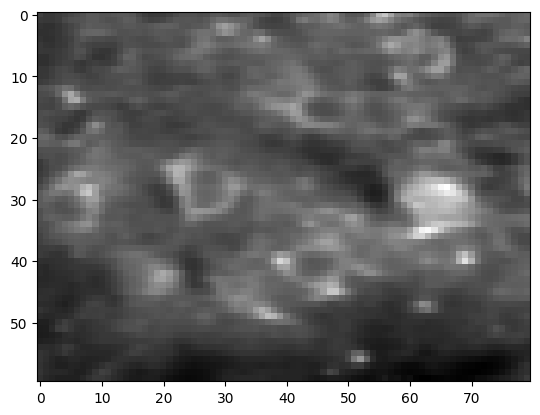

In [12]:
proj = np.mean(movie, axis=0)
proj_smooth = gaussian(proj, sigma=0.5)
plt.imshow(proj_smooth, cmap='gray')

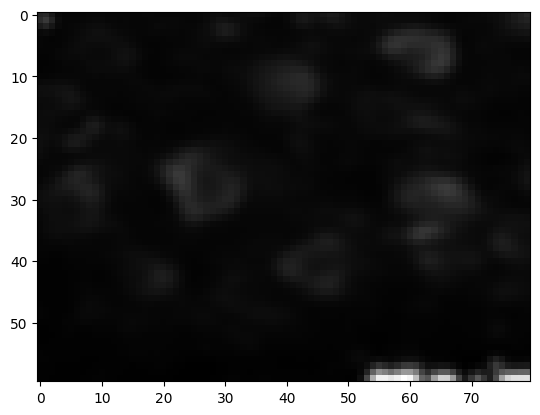

In [9]:
proj = np.max(movie, axis=0)
proj_smooth = gaussian(proj, sigma=1)
plt.imshow(proj_smooth, cmap='gray')

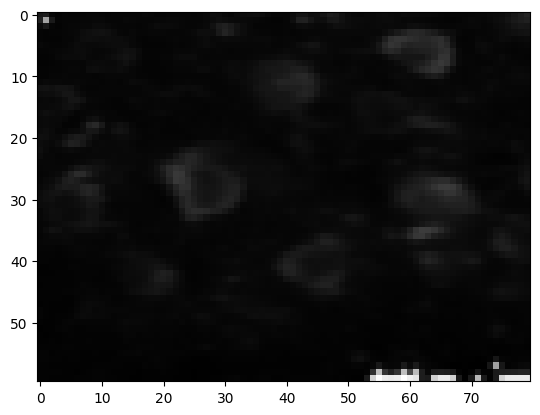

In [13]:
proj = np.max(movie, axis=0)
proj_smooth = gaussian(proj, sigma=0.5)
plt.imshow(proj_smooth, cmap='gray')

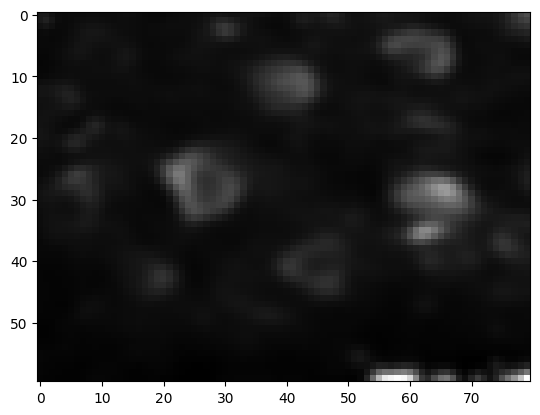

In [10]:
proj = np.std(movie, axis=0)
proj_smooth = gaussian(proj, sigma=1)
plt.imshow(proj_smooth, cmap='gray')

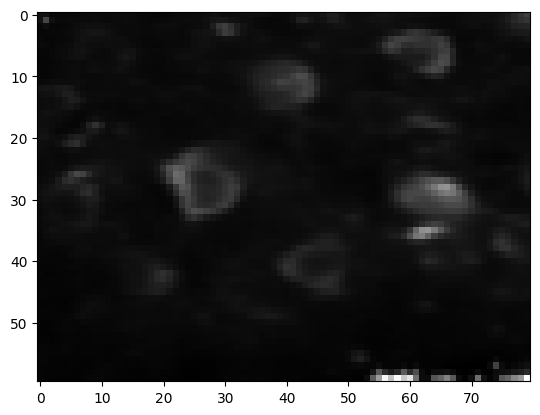

In [14]:
proj = np.std(movie, axis=0)
proj_smooth = gaussian(proj, sigma=0.5)
plt.imshow(proj_smooth, cmap='gray')

Compare raw and smooth image

**Exercise** Compare mean projection with its smoothed version (sigma=0.5)

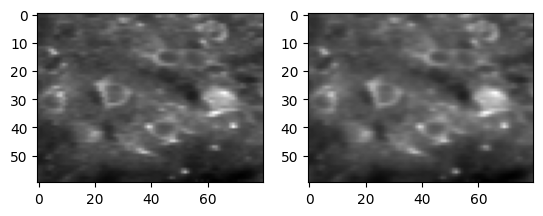

In [26]:
proj = np.mean(movie, axis=0)
proj_smooth = gaussian(proj, sigma=0.5)

plt.subplot(121)
plt.imshow(proj, cmap='gray')

plt.subplot(122)
plt.imshow(proj_smooth, cmap='gray')

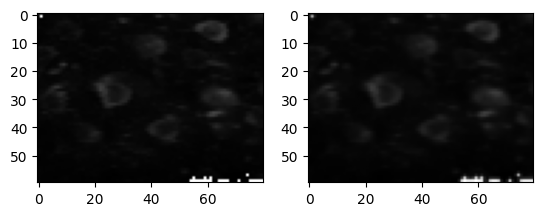

In [16]:
proj = np.max(movie, axis=0)
proj_smooth = gaussian(proj, sigma=0.5)

plt.subplot(121)
plt.imshow(proj, cmap='gray')

plt.subplot(122)
plt.imshow(proj_smooth, cmap='gray')

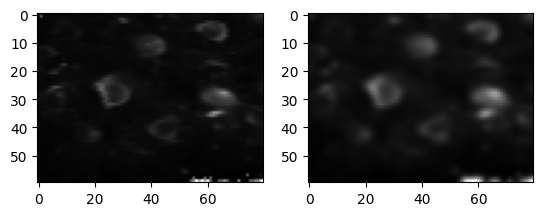

In [27]:
proj = np.std(movie, axis=0)
proj_smooth = gaussian(proj, sigma=1.0)

plt.subplot(121)
plt.imshow(proj, cmap='gray')

plt.subplot(122)
plt.imshow(proj_smooth, cmap='gray')

## Automated ROI Detection  
  
This module introduces a structured approach for identifying neurons automatically in calcium imaging datasets. Manual annotation is useful for small-scale analysis, but for large experiments, automated Region of Interest (ROI) detection is essential. The process will be divided into four stages — enhancing the image, detecting candidates, refining masks, and evaluating results — to help you build a robust and scalable segmentation pipeline.

### **Preparing the Image: Smoothing and Projection**  
  
Raw calcium imaging data often contains noise that can obscure the structure of neurons. Before beginning the detection process, it is important to enhance the image so that relevant features are easier to identify. In this section, you will generate projection images from the full movie and apply Gaussian filtering to reduce high-frequency noise. This will help reveal neuron shapes more clearly and improve the reliability of later detection steps.

**Sub-sections:**
1. Generate summary projections from raw movie data  
2. Apply Gaussian filtering to suppress noise  
3. Compare raw and smoothed images visually  

### **Locating Candidate Neurons: Peak Detection**  
  
Once the image has been enhanced, the next task is to identify candidate locations that may correspond to neurons. Neurons typically appear as bright, circular features in projection images. In this section, you will use peak detection methods to locate local intensity maxima and apply simple filters based on intensity and spacing. These points serve as initial estimates of where neurons might be located, which will be further refined in the next step.

**Sub-sections:**
1. Detect local intensity peaks using a peak-finding algorithm  
2. Apply minimum distance and threshold filters to reduce false positives  
3. Convert detected peaks into a binary mask  
4. Visualize candidate peaks overlaid on the image  


### **Segmenting Neuron Shapes: Refining ROIs**  

Candidate peaks provide approximate locations, but we need to define complete neuron shapes for signal extraction. In this section, you will refine ROI boundaries by applying image segmentation techniques. This includes thresholding the smoothed image, applying morphological operations to clean the binary mask, and labeling connected components. These steps produce full-sized ROIs that are more accurate and ready for evaluation.

**Sub-sections:**
1. Segment the image using global or adaptive thresholding  
2. Apply morphological operations to clean up masks  
3. Label connected components and extract region properties  
4. Filter labeled ROIs by size, area, and compactness  


### **Finalizing ROIs: Review and Export**  
  
Before using the detected ROIs in data analysis, it is essential to review and validate them. Automated methods can produce artifacts or segment non-neuronal structures, so manual inspection is often necessary. In this section, you will review each ROI, discard low-quality ones, and export the results in a format suitable for time-series extraction. This ensures that your final ROI set is clean, consistent, and ready for downstream analysis.

**Sub-sections:**
1. Overlay ROI masks on the image for quality inspection  
2. Remove low-quality or mis-segmented ROIs  
3. Save final ROI masks to disk  
4. Prepare a summary of ROI metrics for record-keeping  